# Rain and temperature relation and prediction in Bangladesh

In [1]:
# importing libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the df
df = pd.read_csv("/content/drive/MyDrive/data.csv")
print(df.head())


       tem  Month  Year      rain
0  16.9760      1  1901   18.5356
1  19.9026      2  1901   16.2548
2  24.3158      3  1901   70.7981
3  28.1834      4  1901   66.1616
4  27.8892      5  1901  267.2150


In [4]:
# some vars
month_labels = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]

# 1. plot rain vs temp scatter plot

This plot represent rain vs temp relation with color intensity. In the plot we can see in low temp bellow 16 degree there is a very little rain. Means in winter season in bangladesh it doesn't rain much, near about 0 mm rain. Also in high temp the rain starts to increase. About 200-1000mm rain falls in temp range of 26 to greater than 30 degree celcious.

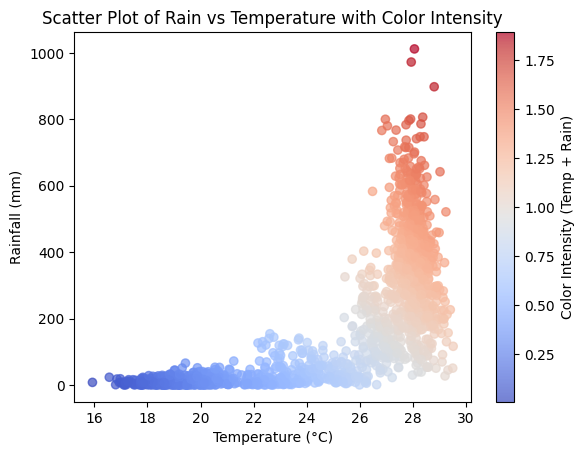

In [5]:
# Normalize the data for better color scaling
df["temp_norm"] = (df["tem"] - df["tem"].min()) / (df["tem"].max() - df["tem"].min())
df["rain_norm"] = (df["rain"] - df["rain"].min()) / (
    df["rain"].max() - df["rain"].min()
)
# Calculate a combined color intensity based on both normalized temperature and rain
df["color_intensity"] = df["temp_norm"] + df["rain_norm"]

scatter = plt.scatter(
    x=df["tem"], y=df["rain"], c=df["color_intensity"], cmap="coolwarm", alpha=0.7
)
plt.colorbar(scatter, label="Color Intensity (Temp + Rain)")

plt.title("Scatter Plot of Rain vs Temperature with Color Intensity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Rainfall (mm)")
plt.show()

# 2. boxplot of rainfall by month

This plot shows average monthly rainfall distribution over the years(1901-2021). The plot shows july is the heaviest rainfall month of the year, rain. Heavy rainfall starts in May an continues till September.

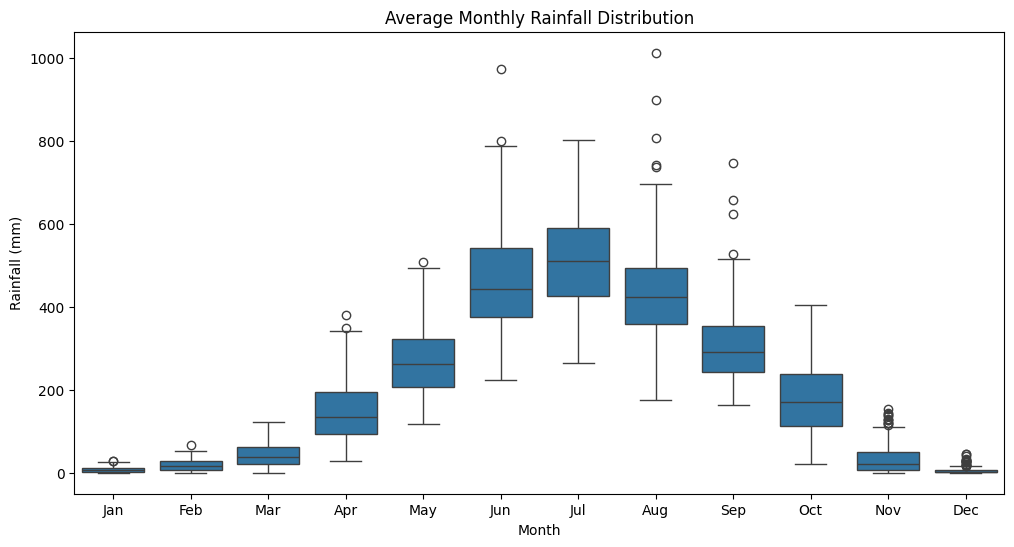

In [6]:

plt.figure(figsize=(12, 6))
sns.boxplot(x="Month", y="rain", data=df)
plt.title("Average Monthly Rainfall Distribution")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.xticks(range(0, 12), labels=month_labels)
plt.show()

# 3. plot temperature by month

This plot shows average monthly temp distribution over the years(1901-2021). The plot shows April-October is the hottest months of the year. Temp starts rising from March, starts decline in November. Dec, Jan and Feb are the coolest months of the year on average.

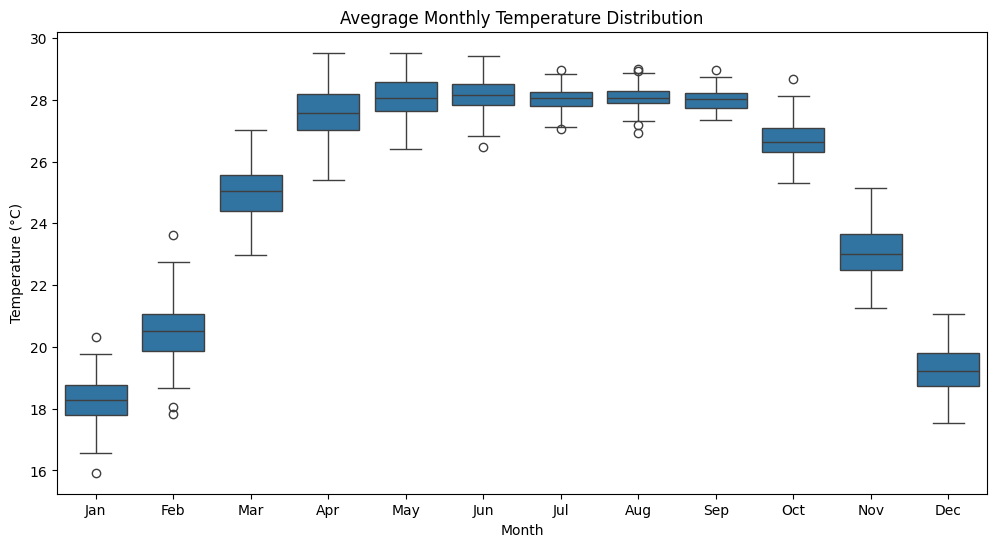

In [7]:

plt.figure(figsize=(12, 6))
sns.boxplot(x="Month", y="tem", data=df)
plt.title("Avegrage Monthly Temperature Distribution")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.xticks(range(0, 12), labels=month_labels)
plt.show()

# 4. plot yearly trend of temperature and rainfall

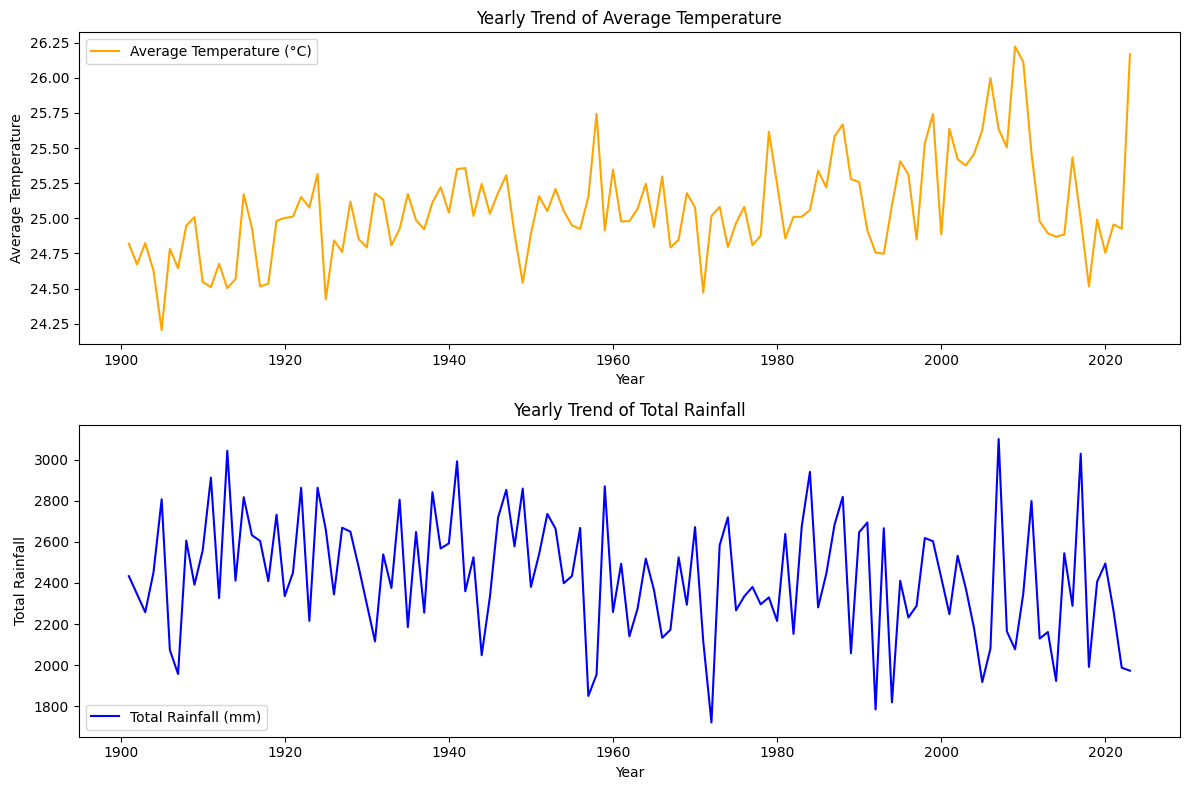

In [8]:
# Calculate the yearly average for temperature and rainfall
yearly_data = df.groupby("Year").agg({"tem": "mean", "rain": "sum"}).reset_index()

# Rename columns for clarity
yearly_data.columns = ['Year', 'avg_tem', 'total_rain']

# Plot the yearly trend of temperature and rainfall
plt.figure(figsize=(12, 8))
# Plot for Average Temperature
plt.subplot(2, 1, 1)
plt.plot(yearly_data['Year'], yearly_data['avg_tem'], label='Average Temperature (°C)', color='orange')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Yearly Trend of Average Temperature')
plt.legend()

# Plot for Total Rainfall
plt.subplot(2, 1, 2)
plt.plot(yearly_data['Year'], yearly_data['total_rain'], label='Total Rainfall (mm)', color='blue')
plt.xlabel('Year')
plt.ylabel('Total Rainfall')
plt.title('Yearly Trend of Total Rainfall')
plt.legend()

plt.tight_layout()
plt.show()

# ML Models

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 459.3357
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.1086
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.9825
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.7161
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.7138
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.3833
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.6224
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.6914
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.9939
Epoch 10/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.4214
Epoch 11/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.8178
Epoch 12/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.8815
Epoch 13/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.1628
Epoch 14/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.5603
Epoch 15/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 51440.9492
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39474.0547
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43568.8203
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40900.5000
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42258.0898
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45553.6836
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40827.3164
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43965.3945
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41318.6523
Epoch 10/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40485.9023
Epoch 11/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39152.9531
Epoch 12/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40915.9297
Epoch 13/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39370.1914
Epoch 14/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39201.9219
Epoch 15/100
74/74 ━━━━━━━━

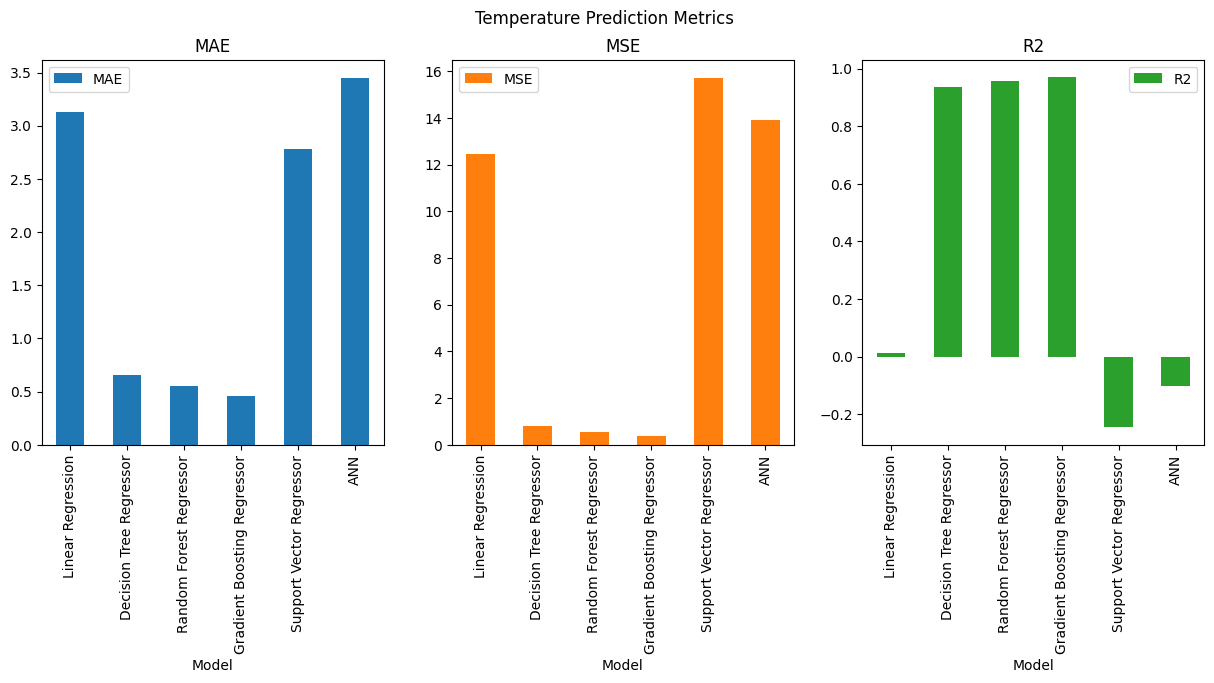

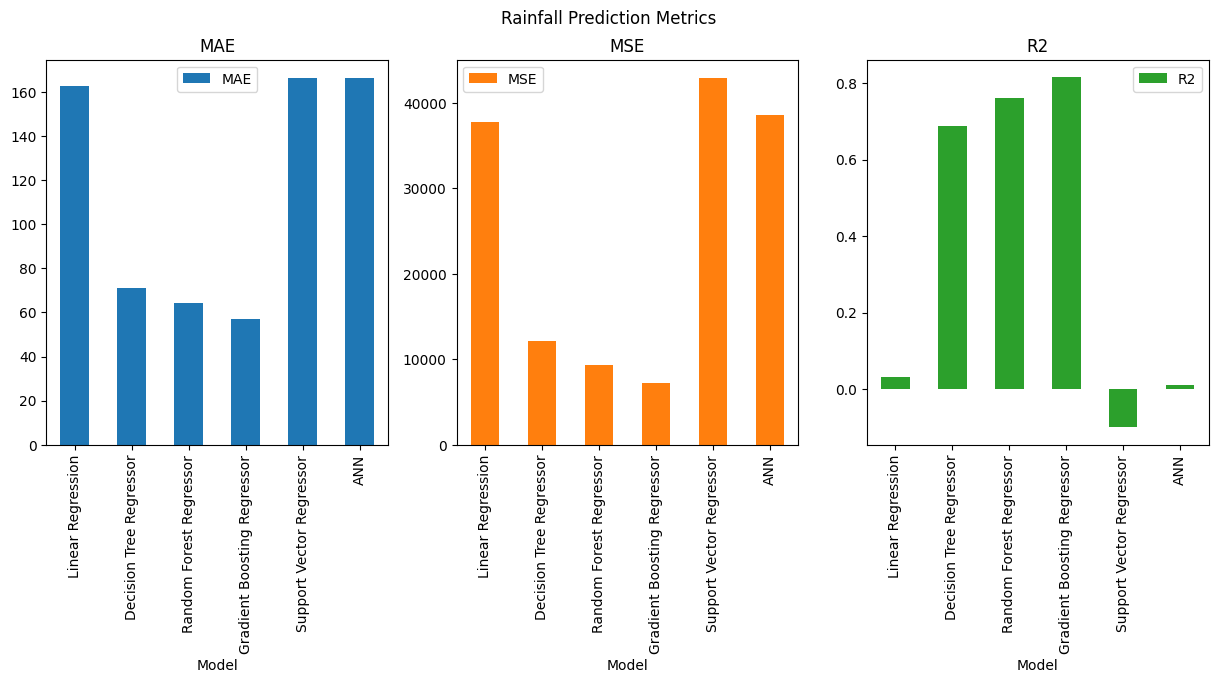

In [9]:
# Data preparation
features = df[['Month', 'Year']]
target_temp = df['tem']
target_rain = df['rain']

# Split data into training and testing sets
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(features, target_temp, test_size=0.2, random_state=42)
X_train_rain, X_test_rain, y_train_rain, y_test_rain = train_test_split(features, target_rain, test_size=0.2, random_state=42)

# Function to evaluate models and return MAE, MSE, R2, and residuals
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    residuals = y_test - y_pred
    return mae, mse, r2, residuals

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Evaluate models for temperature prediction
results_temp = []

for name, model in models.items():
    mae_temp, mse_temp, r2_temp, _ = evaluate_model(model, X_train_temp, y_train_temp, X_test_temp, y_test_temp)
    results_temp.append({'Model': name, 'MAE': mae_temp, 'MSE': mse_temp, 'R2': r2_temp})

# Evaluate models for rainfall prediction
results_rain = []

for name, model in models.items():
    mae_rain, mse_rain, r2_rain, _ = evaluate_model(model, X_train_rain, y_train_rain, X_test_rain, y_test_rain)
    results_rain.append({'Model': name, 'MAE': mae_rain, 'MSE': mse_rain, 'R2': r2_rain})

# Build and evaluate the ANN model for temperature prediction
ann_model_temp = Sequential([
    Dense(64, input_dim=X_train_temp.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])

ann_model_temp.compile(optimizer='adam', loss='mean_squared_error')
ann_model_temp.fit(X_train_temp, y_train_temp, epochs=100, batch_size=16, verbose=1)

y_pred_temp_ann = ann_model_temp.predict(X_test_temp)
mae_temp_ann = mean_absolute_error(y_test_temp, y_pred_temp_ann)
mse_temp_ann = mean_squared_error(y_test_temp, y_pred_temp_ann)
r2_temp_ann = r2_score(y_test_temp, y_pred_temp_ann)
results_temp.append({'Model': 'ANN', 'MAE': mae_temp_ann, 'MSE': mse_temp_ann, 'R2': r2_temp_ann})

# Build and evaluate the ANN model for rainfall prediction
ann_model_rain = Sequential([
    Dense(64, input_dim=X_train_rain.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])

ann_model_rain.compile(optimizer='adam', loss='mean_squared_error')
ann_model_rain.fit(X_train_rain, y_train_rain, epochs=100, batch_size=16, verbose=1)

y_pred_rain_ann = ann_model_rain.predict(X_test_rain)
mae_rain_ann = mean_absolute_error(y_test_rain, y_pred_rain_ann)
mse_rain_ann = mean_squared_error(y_test_rain, y_pred_rain_ann)
r2_rain_ann = r2_score(y_test_rain, y_pred_rain_ann)
results_rain.append({'Model': 'ANN', 'MAE': mae_rain_ann, 'MSE': mse_rain_ann, 'R2': r2_rain_ann})

# Convert results to DataFrame for better visualization
results_temp_df = pd.DataFrame(results_temp)
results_rain_df = pd.DataFrame(results_rain)

# Print the results
print("Temperature Prediction Results")
print(results_temp_df)

print("\nRainfall Prediction Results")
print(results_rain_df)

# Visualization of Results
results_temp_df.plot(x='Model', y=['MAE', 'MSE', 'R2'], kind='bar', subplots=True, layout=(1, 3), figsize=(15, 5), title='Temperature Prediction Metrics')
results_rain_df.plot(x='Model', y=['MAE', 'MSE', 'R2'], kind='bar', subplots=True, layout=(1, 3), figsize=(15, 5), title='Rainfall Prediction Metrics')
plt.show()